In [86]:
import pandas as pd
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

Datos obtenidos de:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv

In [2]:
raw = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
raw.shape

(253680, 22)

In [3]:
raw.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


En los datos crudos tenemos 21 variables independientes para determinar la variable dependiente objetivo **Diabetes_012**, la cual es una variable categorica con tres posibles resultados, 0, 1 o 2, que significan *no diabetes*, *prediabetes* y *diabetes* respectivamente.

Nuestras variables son:
1. HighBP, categorica binaria
1. HighChol, categorica binaria
1. CholCheck, categorica binaria
1. BMI, existen 84 valores enteros unicos dentro del dataset y esta sesgado, favoreciendo valores entre 20 y 40
1. Smoker, categorica binaria
1. Stroke, categorica binaria
1. HeartDiseaseorAttack, categorica binaria
1. HeartDiseaseorAttack, categorica binaria
1. Fruits, categorica binaria
1. Veggies, categorica binaria
1. HvyAlcoholConsump, categorica binaria
1. AnyHealthcare, categorica binaria
1. NoDocbcCost, categorica binaria
1. GenHlth, categorica con cinco posibles valores
1. MentHlth, valores enteros entre 0 y 30 posibles valores con la mayoria de valores siendo 0
1. PhysHlth, comportamiento similar a MentHlth
1. DiffWalk, categorica binaria
1. Sex, categorica binaria
1. Age, categoriza rangos de edades en 13 posibles categorias
1. Education, categoriza el nivel de educacion en 6 posibles categorias
1. Income, categoriza el nivel de ingreso en 8 posibles categorias

La gran mayoria de las variables son categoricas binarias, con excepciones para BMI, MentHlth, PhysHlth, Age, Education e Income.

Las variables categoricas binarias no necesitan ningun preprocesamiento, pero MentHlth, PhysHlth, Age, Education e Income pasaran por one_hot encoding. Por otra parte, BMI seran tratadas como variable numerica, esta variable presenta comportamiento leptocurtico con asimetria positiva, se le aplicara una transformacion logaritmica para normalizar los datos.

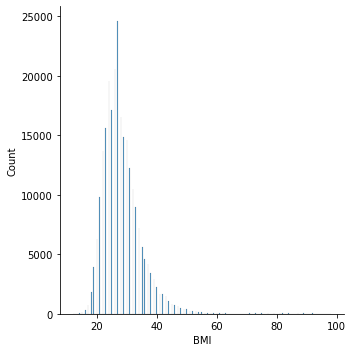

In [47]:
sns.displot(raw.BMI)

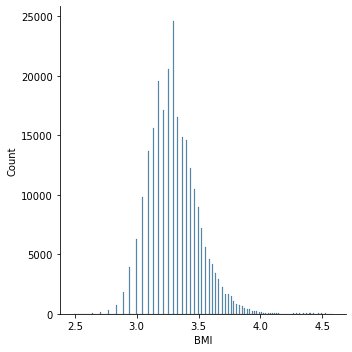

In [51]:
sns.displot(np.log(raw.BMI))

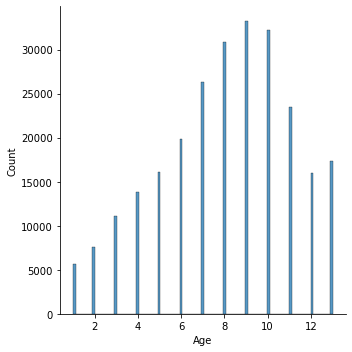

In [10]:
sns.displot(raw.Age)

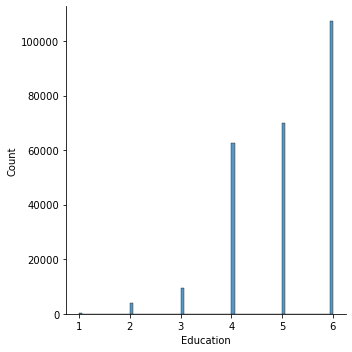

In [12]:
sns.displot(raw.Education)

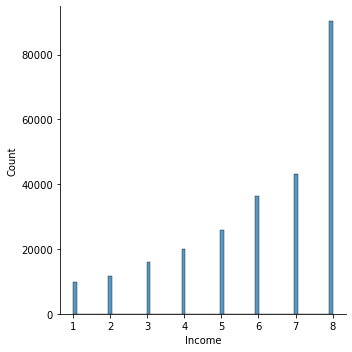

In [50]:
sns.displot(raw.Income)

# Creando nuevo dataset con transformaciones y train/test split

In [64]:
data = pd.get_dummies(data = raw, columns = ["MentHlth", "PhysHlth", "Age", "Education", "Income"])
data.BMI = np.log(raw.BMI)
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,1.0,3.688879,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,3.218876,1.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,3.332205,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,3.295837,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,3.178054,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
5,0.0,1.0,1.0,1.0,3.218876,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
6,0.0,1.0,0.0,1.0,3.401197,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
7,0.0,1.0,1.0,1.0,3.218876,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8,2.0,1.0,1.0,1.0,3.401197,1.0,0.0,1.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,0
9,0.0,0.0,0.0,1.0,3.178054,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
train, test = train_test_split(data, test_size=0.2)
train.shape, test.shape

((202944, 106), (50736, 106))

In [82]:
train_y = pd.get_dummies(data = train[["Diabetes_012"]], columns = ["Diabetes_012"]).to_numpy()
test_y = pd.get_dummies(data = test[["Diabetes_012"]], columns = ["Diabetes_012"]).to_numpy()

train_x = train.iloc[:,1:].to_numpy()
test_x = test.iloc[:,1:].to_numpy()
train_x.shape

(202944, 105)

# Modelado

### Creando una ANN simple

In [92]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "adam",
                   metrics = "accuracy")

simple_ann.fit(train_x, train_y,
              batch_size = 64,
              epochs = 10)

simple_ann.evaluate(test_x, test_y)

Epoch 1/10
3171/3171 [==============================] - 4s 1ms/step - loss: 0.4134 - accuracy: 0.8439
Epoch 2/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.4014 - accuracy: 0.8472: 0s - loss: 0.4015 - accuracy: 0.84
Epoch 3/10
3171/3171 [==============================] - 4s 1ms/step - loss: 0.3981 - accuracy: 0.8478
Epoch 4/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.3961 - accuracy: 0.8487
Epoch 5/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.3941 - accuracy: 0.8499
Epoch 6/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.3929 - accuracy: 0.8499
Epoch 7/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.3912 - accuracy: 0.8503
Epoch 8/10
3171/3171 [==============================] - 4s 1ms/step - loss: 0.3896 - accuracy: 0.8507: 0s - loss: 0.3899 - accuracy: 0.
Epoch 9/10
3171/3171 [==============================] - 3s 1ms/step - loss: 0.3878 - accuracy: 0.8517: 0s - loss: 

[0.3979153037071228, 0.8469922542572021]

# Implementando una funcion entrenadora y evaluadora

In [ ]:
def model_selector()

### Creando una ANN simple con k-fold validation

In [84]:
num_folds = 10
acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train, test in kfold.split(train_x, train_y):
    simple_ann = Sequential()
    simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (1, train_x.shape[1])))
    simple_ann.add(Dense(units = 10))